In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [2]:
# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

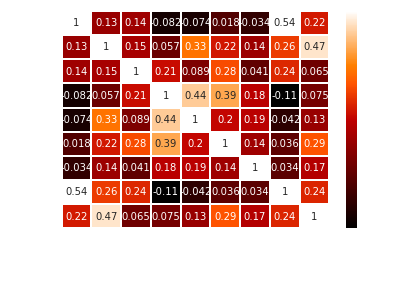

In [9]:
sns.heatmap(df.corr(), linewidth=0.1, vmax=0.5, cmap=colormap,
           linecolor='white', annot=True)
plt.show()

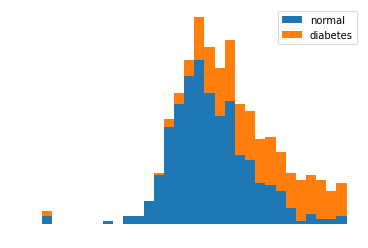

In [10]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

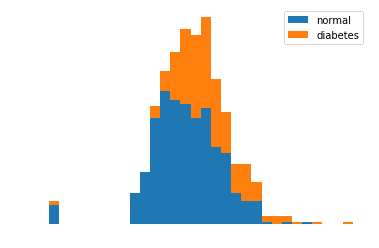

In [11]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

## 피마 인디언의 당뇨병 예측하기

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 y로 지정합니다.
y = df.iloc[:,8]

In [41]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
# model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])

#모델을 실행합니다.
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 0s 645us/step - loss: 8.8285 - accuracy: 0.5990
Epoch 2/100
154/154 [==============================] - 0s 584us/step - loss: 2.4834 - accuracy: 0.5807
Epoch 3/100
154/154 [==============================] - 0s 584us/step - loss: 1.7506 - accuracy: 0.5990
Epoch 4/100
154/154 [==============================] - 0s 583us/step - loss: 1.3352 - accuracy: 0.6042
Epoch 5/100
154/154 [==============================] - 0s 582us/step - loss: 1.0330 - accuracy: 0.6497
Epoch 6/100
154/154 [==============================] - 0s 607us/step - loss: 0.8567 - accuracy: 0.6471
Epoch 7/100
154/154 [==============================] - 0s 578us/step - loss: 0.7914 - accuracy: 0.6250
Epoch 8/100
154/154 [==============================] - 0s 593us/step - loss: 0.7794 - accuracy: 0.6198
Epoch 9/100
154/154 [==============================] - 0s 605us/step - loss: 0.7187 - accuracy: 0.6393
Epoch 10/100
154/154 [==============================] - 0s 586us/step - l

154/154 [==============================] - 0s 602us/step - loss: 0.5245 - accuracy: 0.7500
Epoch 80/100
154/154 [==============================] - 0s 605us/step - loss: 0.5396 - accuracy: 0.7357
Epoch 81/100
154/154 [==============================] - 0s 591us/step - loss: 0.5779 - accuracy: 0.7240
Epoch 82/100
154/154 [==============================] - 0s 606us/step - loss: 0.5531 - accuracy: 0.7292
Epoch 83/100
154/154 [==============================] - 0s 574us/step - loss: 0.5361 - accuracy: 0.7409
Epoch 84/100
154/154 [==============================] - 0s 592us/step - loss: 0.5437 - accuracy: 0.7253
Epoch 85/100
154/154 [==============================] - 0s 587us/step - loss: 0.5524 - accuracy: 0.7487
Epoch 86/100
154/154 [==============================] - 0s 633us/step - loss: 0.5419 - accuracy: 0.7370
Epoch 87/100
154/154 [==============================] - 0s 596us/step - loss: 0.5611 - accuracy: 0.7409
Epoch 88/100
154/154 [==============================] - 0s 593us/step - loss:

## 다중 분류 문제 해결하기

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
history = model.fit(X, y, epochs=50, batch_size=5)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
30/30 [==============================] - 0s 783us/step - loss: 1.3389 - accuracy: 0.3333
Epoch 2/50
30/30 [==============================] - 0s 703us/step - loss: 1.1091 - accuracy: 0.4533
Epoch 3/50
30/30 [==============================] - 0s 672us/step - loss: 1.0769 - accuracy: 0.5267
Epoch 4/50
30/30 [=